## **Notebook to Demonstrate Sampling Capabilities**

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../../')
import numpy as np

from probabilistic.capabilities.uncertainty_definitions import NormalDistribution, UniformDistribution, LognormalDistribution, TruncatedNormalDistribution, DeterministicCharacterization
from probabilistic.capabilities.sampling import RandomStudy, LHSStudy
from probabilistic.capabilities.plotting import plot_sample_histogram, plot_distribution_pdf, plot_scatter_matrix

#### Create Example Distributions

In [6]:
study_parameters = {}
study_parameters['parameter_1'] = NormalDistribution(name='parameter 1',
                                                     uncertainty_type='aleatory',
                                                     nominal_value=5,
                                                     mean=5,
                                                     std_deviation=1)

study_parameters['parameter_2'] = UniformDistribution(name='parameter 2',
                                                      uncertainty_type='aleatory',
                                                      nominal_value=2,
                                                      lower_bound=0,
                                                      upper_bound=5)

study_parameters['parameter_3'] = LognormalDistribution(name='parameter 3',
                                                        uncertainty_type='aleatory',
                                                        nominal_value=1,
                                                        mu=-.3,
                                                        sigma=.3)

study_parameters['parameter_4'] = TruncatedNormalDistribution(name='parameter 4',
                                                              uncertainty_type='epistemic',
                                                              nominal_value=2,
                                                              mean=2,
                                                              std_deviation=1,
                                                              lower_bound=0,
                                                              upper_bound=4)

study_parameters['deterministic_1'] = DeterministicCharacterization(name='deterministic 1',
                                                                    value=5)

#### Generate Plots of Parameter's PDF

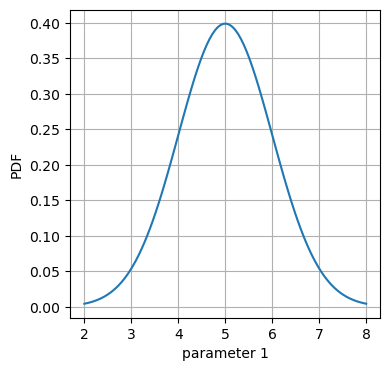

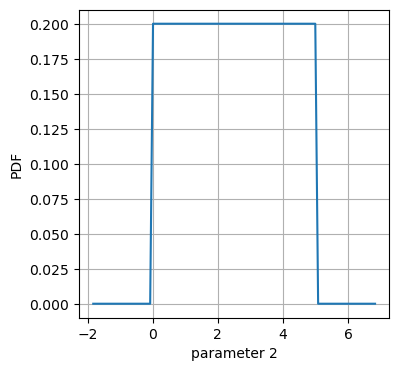

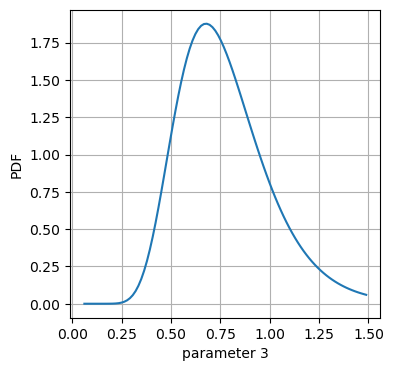

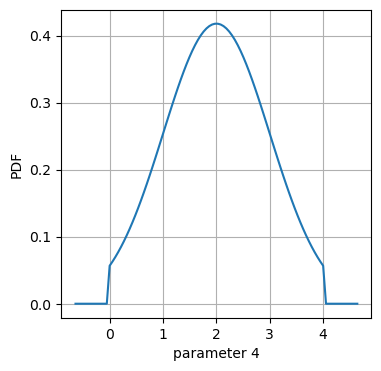

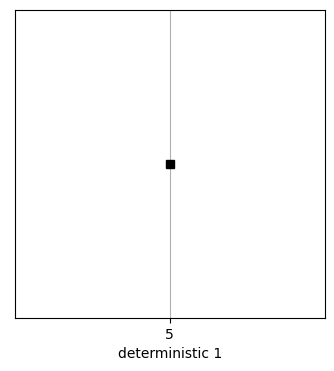

In [7]:
for name, parameter in study_parameters.items():
    parameter.plot_distribution()

#### Generate Histogram Plots of Parameter Samples

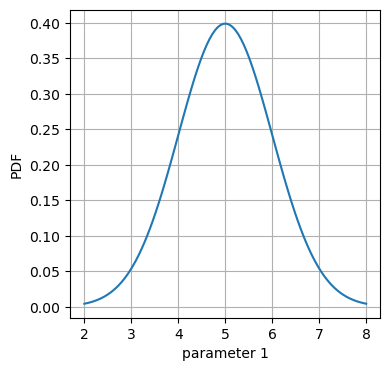

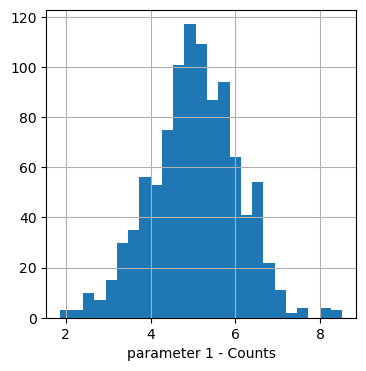

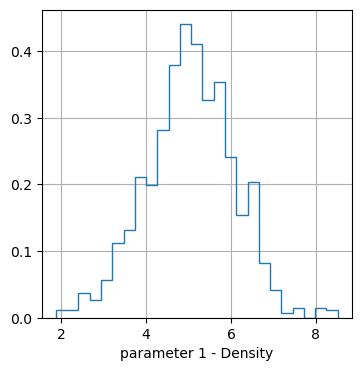

In [8]:
samples_parameter_1 = study_parameters['parameter_1'].generate_samples(sample_size=1_000)

study_parameters['parameter_1'].plot_distribution()

plot_sample_histogram(samples_parameter_1,
                      'parameter 1 - Counts')

plot_sample_histogram(samples_parameter_1,
                      'parameter 1 - Density',
                      density=True,
                      histtype='step')

#### Demonstrate Different Types of Parameter Sampling

In [9]:
mc_study = RandomStudy(number_of_aleatory_samples=100,
                       number_of_epistemic_samples=7,
                       random_state=np.random.default_rng())
mc_study.add_variables(study_parameters)
mc_samples = mc_study.create_variable_sample_sheet()

lhs_study = LHSStudy(number_of_aleatory_samples=100,
                     number_of_epistemic_samples=7,
                     random_state=np.random.default_rng())
lhs_study.add_variables(study_parameters)
lhs_samples = lhs_study.create_variable_sample_sheet()

#### Make A Scatter Plot of Monte Carlo Samples

In [10]:
mc_samples

{'parameter 1': array([2.94627781, 5.03489834, 5.3651094 , 4.39516999, 6.02702025,
        4.82173521, 4.87313662, 5.59238097, 3.83069401, 4.5361784 ,
        4.5674004 , 3.93433352, 5.93361001, 4.83753509, 6.79270475,
        3.56625534, 5.04018862, 6.45183108, 5.36382249, 4.85777201,
        4.29427048, 6.55205376, 5.45968739, 4.36271384, 5.38742534,
        3.8270856 , 4.91408175, 4.44568568, 5.1185759 , 6.15968686,
        5.92487483, 5.23400275, 4.70792533, 6.13745927, 5.70495493,
        4.34343818, 5.25352492, 4.14106359, 5.02084259, 4.15842147,
        5.58096136, 5.53734103, 5.76375209, 4.46680546, 4.54002148,
        6.08085644, 7.04341219, 3.97880227, 4.77837172, 4.43935603,
        4.76681824, 5.87022473, 4.94154691, 4.18930625, 6.06057904,
        5.44713789, 5.59687415, 5.41402812, 3.80495352, 5.06089271,
        6.05457404, 5.01527303, 5.3778542 , 6.2641582 , 4.02570971,
        5.88553742, 2.71582621, 5.21944081, 5.41950286, 4.70673783,
        3.00700551, 5.77526224, 5

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


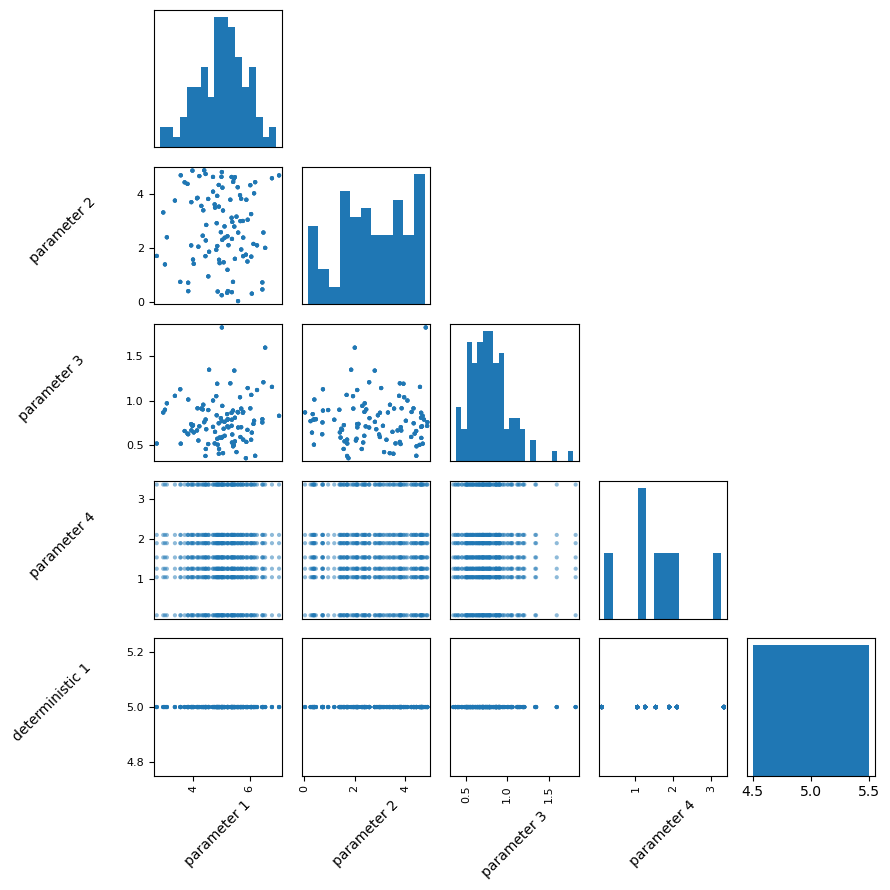

In [11]:
plot_scatter_matrix(mc_samples);

#### Make A Scatter Plot of LHS Samples

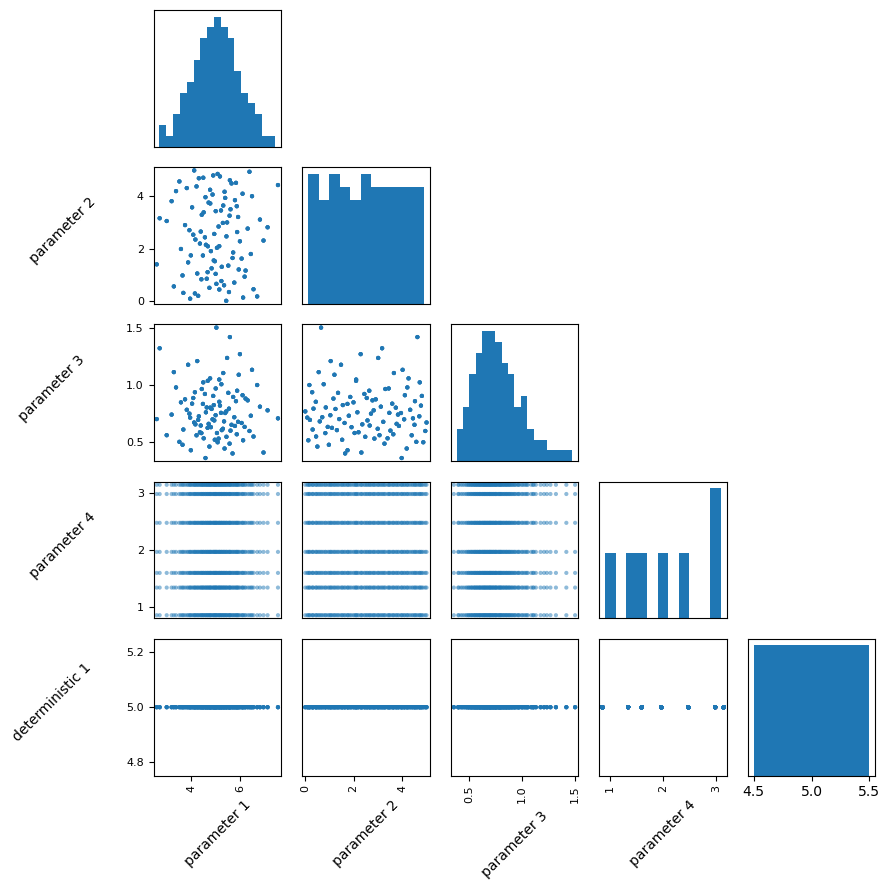

In [12]:
plot_scatter_matrix(lhs_samples)